## Stochastic Discount Factor ##

>Suppose that consumption growth has lognormal distribution with the possibility of rare disasters:

>Here ε is a standard normal random variable, while ν is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).
Simulate ε with (at least) 100,000 random draws from standard normal distribution, and simulate ν with (at least) 100,000 random draws from standard uniform distribution.
Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility:



In [1]:
import pandas as pd;
import numpy as np;
import statsmodels.api as sm;
import statsmodels.stats.api as sms;
import statsmodels.discrete.discrete_model as smdiscrete
import functools as ft
import matplotlib.pyplot as plt

In [2]:
# Number of random draws
num_draws = 100000
rng = np.random.default_rng(20231011)

# Simulate ε from a standard normal distribution
epsilon = rng.standard_normal(size = num_draws)

# Simulate ν with the given probabilities
probability = rng.uniform(size= num_draws)
nu = np.where(probability <= 0.017, np.log(0.65),0)

# Calculate consumption growth
consumption_growth = np.exp(0.02 + 0.02 * epsilon + nu)

# Create a DataFrame
consumption_growth_df = pd.DataFrame({'Epsilon': epsilon, 'Nu': nu, 'Consumption Growth': consumption_growth})
consumption_growth_df



,Epsilon,Nu,Consumption Growth
0,0.129953,0.0,1.022856
1,-0.128113,0.0,1.017591
2,-0.158469,0.0,1.016973
3,-0.953343,0.0,1.000934
4,-0.487305,0.0,1.010307
...,...,...,...
99995,1.101857,0.0,1.042933
99996,0.631460,0.0,1.033167
99997,-0.124966,0.0,1.017655
99998,-0.517775,0.0,1.009691


>Repeat this process for values of γ in the range from 1 to 4, in increments of 0.1 (or less). (Note that you can reuse the same simulated distribution of consumption growth for all values of γ). 

>Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

/Users/sunshinehuang/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Users/sunshinehuang/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/Users/sunshinehuang/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/Users/sunshinehuang/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will rais

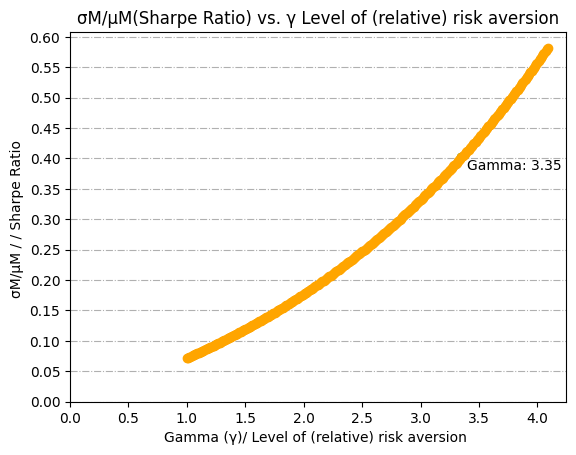

In [5]:
# Simulated consumption growth data (use the previously generated data)
consumption_growth = consumption_growth_df['Consumption Growth']

# Define the range of γ values
gamma_values = np.arange(1, 4.1, 0.01)
discount_factor = 0.99

# Initialize lists to store μM and σM for each γ
mu_M_list = []
sigma_M_list = []

# Calculate μM and σM for each value of γ
for gamma in gamma_values:
    pricing_kernel = 0.99 * consumption_growth**(-gamma)
    mu_M = np.mean(pricing_kernel)
    sigma_M = np.std(pricing_kernel)
    mu_M_list.append(mu_M)
    sigma_M_list.append(sigma_M)

# Calculate σM/μM for each γ
sigma_over_mu = np.array(sigma_M_list) / np.array(mu_M_list)

# Create a DataFrame to store the results
results = pd.DataFrame({'Gamma': gamma_values, 'Mu_M': mu_M_list, 'Sigma_M': sigma_M_list, 'Sigma_over_Mu': sigma_over_mu})
plt.plot(gamma_values, sigma_over_mu, marker='o', linestyle='-.', color='orange')

plt.scatter(smallest_gamma["Gamma"],
         smallest_gamma["Sigma_over_Mu"],
            c = "green",
           )

plt.text(smallest_gamma["Gamma"] + 0.05,
      smallest_gamma["Sigma_over_Mu"] - 0.02,
         f"Gamma: {smallest_gamma['Gamma'].values[0]:.2f}")

y_ticks = np.arange(0.00, 0.62, 0.05)
plt.yticks(y_ticks)
plt.xlabel('Gamma (γ)/ Level of (relative) risk aversion ')
plt.ylabel('σM/μM / / Sharpe Ratio ')
plt.title('σM/μM(Sharpe Ratio) vs. γ Level of (relative) risk aversion')
plt.xlim(left=0)
plt.grid(axis='y', linestyle='-.', which='major')
plt.show()

In [4]:
# Find the smallest value of γ for which σM/μM > 0.4
smallest_gamma = results[results['Sigma_over_Mu'] > 0.4].iloc[[0]]
smallest_gamma

,Gamma,Mu_M,Sigma_M,Sigma_over_Mu
235,3.35,0.978823,0.393093,0.401597


> The smallest γ with σM/μM > 0.4 is 3.35

> Explain (in words, without using any mathematical  equations or formulas) the economic significance of this result.


The smallest value of γ for which σM/μM > 0.4 at 3.35 meant that the results is within the H-J bound, there is no equity premium puzzle since gamma being 3.35 represents a reasonable degree of relative risk aversion. In an attempt to factor in the possibility of rare disasters, volatility is greatly increased which results in extreme left skewness of consumption growth graph, and this can be done via the small increase of gamma value to match the left skewness of consumption graph.

Investors are very risk-averse and would be willing to pay a premium to avoid risk and have a better guarantee in returns.